# goal of the work 

272 breast cancer patients (as rows), 1570 columns.
Network built using only gene expression.
Meta data includes patient info, treatment, and survival.

Each node is a group of patients similar to each other. 
genetic indicators of poor survivors (i.e. low ESR1 levels, which is typically the prognostic indicator of poor outcomes in breast cancer) – understanding this group could be critical for helping improve mortality rates for this disease. Why this group survived was quickly analysed by using the Outcome Column (here Event Death - which is binary - 0,1) as a Data Lens (which we term Supervised vs Unsupervised analyses).

# loading the librairies 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import yellowbrick as yb
from sklearn.cluster import AgglomerativeClustering,KMeans
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, normalize


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df=pd.read_csv("NKI_cleaned.csv",sep=",")
df

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,...,Contig36312_RC,Contig38980_RC,NM_000853,NM_000854,NM_000860,Contig29014_RC,Contig46616_RC,NM_000888,NM_000898,AF067420
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,...,0.591103,-0.355018,0.373644,-0.760690,-0.164025,-0.038726,0.237856,-0.087631,-0.369153,0.153795
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,...,-0.199829,-0.001635,-0.062922,-0.682204,-0.220934,-0.100088,-0.466537,-0.231547,-0.643019,-0.014098
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,...,0.328736,-0.047571,0.084228,-0.695950,-0.402840,-0.099965,0.110155,-0.114298,0.258495,-0.198911
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,...,0.648861,-0.039088,0.182182,-0.524640,0.037320,-0.167688,-0.016790,-0.285344,-0.251188,0.862710
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,...,-0.287538,-0.286893,0.057082,-0.565021,-0.105632,-0.108148,-0.405853,-0.053601,-0.677072,0.134160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,s71,308,48,1,2.608300,1.982204,1,0,1,1,...,-0.695745,-0.076025,0.201054,-0.108361,0.222534,-0.471391,0.026301,0.476758,-0.468408,-0.843889
268,s72,309,39,1,5.504100,3.028063,0,0,1,1,...,-0.743322,0.108220,0.083472,-0.859677,-0.551512,-0.191424,-0.844488,-0.357929,-0.585760,0.169989
269,s73,310,50,1,2.619200,2.149213,0,0,1,1,...,-0.778710,0.251779,-0.063160,0.450576,0.452686,1.055764,0.591880,-0.510884,0.251903,-0.822792
270,s75,311,52,1,2.290500,2.209446,0,1,1,1,...,-0.614775,-0.417394,-0.077948,-0.126006,-0.841332,-0.274742,-0.063019,-0.396531,0.356816,0.345088


# data preprocessing and cleaning 

here we check if the data contains null values 

df.isnull().sum()

we are going to drop the unnecessary columns 

In [3]:
df_todrop=df.columns[15:]
df=df.drop(df_todrop,axis=1)

# data Visualisation 


let's do some data viz on our datalist 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C4AC548>,
      dtype=object)

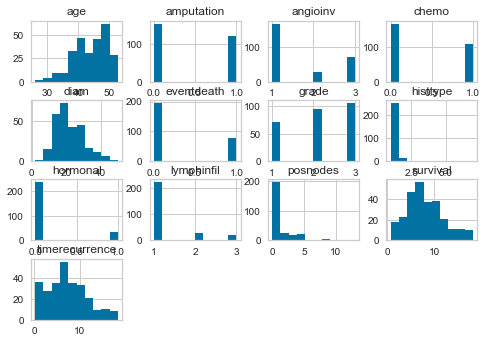

In [4]:
df.drop(["Patient","ID"],axis=1).hist()

# consatations :

In [5]:
df.describe()

,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,161.194853,44.047794,0.283088,8.080609,7.250433,0.393382,0.132353,0.441176,1.110294,22.529412,1.341912,2.128676,1.647059,1.261029
std,85.104899,5.464538,0.451329,3.904874,4.177462,0.489401,0.339499,0.497443,0.545668,8.703345,2.108848,0.797821,0.876334,0.596629
min,18.000000,26.000000,0.000000,0.711841,0.271047,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000
25%,86.750000,40.750000,0.000000,5.499738,4.389459,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000
50%,159.500000,45.000000,0.000000,7.359343,6.950034,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,2.000000,1.000000,1.000000
75%,235.250000,49.000000,1.000000,10.512662,9.986311,1.000000,0.000000,1.000000,1.000000,29.250000,2.000000,3.000000,3.000000,1.000000
max,312.000000,53.000000,1.000000,18.340862,18.340862,1.000000,1.000000,1.000000,7.000000,50.000000,13.000000,3.000000,3.000000,3.000000


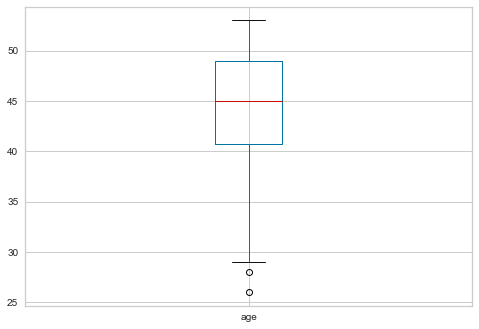

In [6]:

df["age"].plot.box()

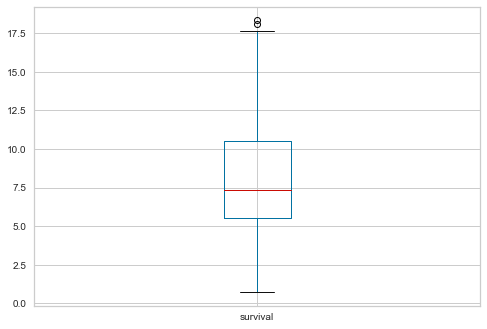

In [7]:

df["survival"].plot.box()

Text(0, 0.5, 'survival')

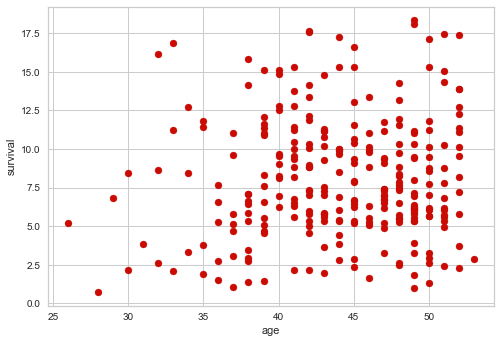

In [8]:
x=df["age"]
y=df["survival"]
plt.scatter(x,y, color ="r") 
plt.xlabel("age")
plt.ylabel("survival")

Text(0, 0.5, 'eventdeath')

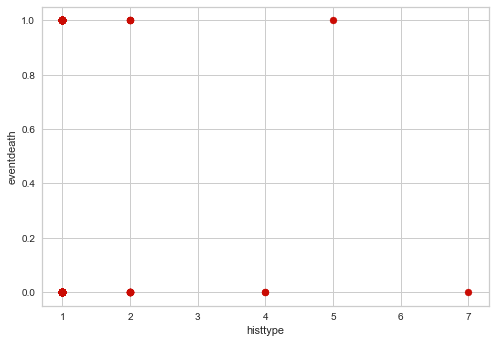

In [9]:
x=df["histtype"]
y=df["eventdeath"]
plt.scatter(x,y, color ="r") 
plt.xlabel("histtype")
plt.ylabel("eventdeath")

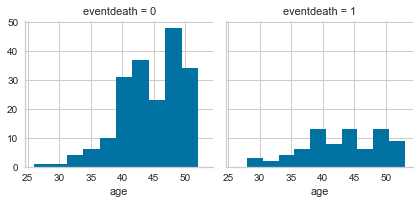

In [10]:
import seaborn as sns 
g=sns.FacetGrid(df, col="eventdeath")
g.map(plt.hist,"age")

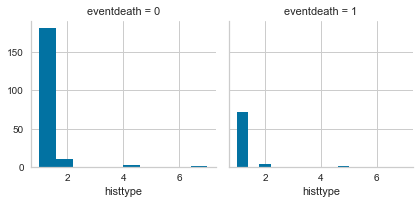

In [11]:
import seaborn as sns 
g=sns.FacetGrid(df, col="eventdeath")
g.map(plt.hist,"histtype")

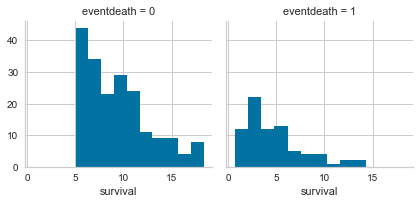

In [12]:
import seaborn as sns 
g=sns.FacetGrid(df, col="eventdeath")
g.map(plt.hist,"survival")

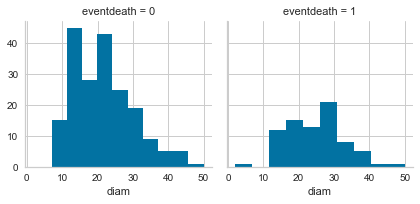

In [13]:
import seaborn as sns 
g=sns.FacetGrid(df, col="eventdeath")
g.map(plt.hist,"diam")

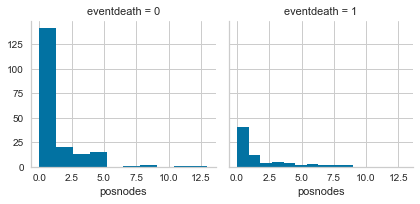

In [14]:
import seaborn as sns 
g=sns.FacetGrid(df, col="eventdeath")
g.map(plt.hist,"posnodes")

# consatations :

- the age of patients is not a parameter that reinforce the survival of the patients 
- posnodes, diam and survival are relevant parameters in the death or the living of the patient


In [15]:
df_result=df[["survival","timerecurrence","chemo","hormonal","amputation","histtype"]].groupby(["survival"], as_index=True).mean()
df_result

,timerecurrence,chemo,hormonal,amputation,histtype
survival,,,,,
0.711841,0.271047,0.0,0.0,0.0,1.0
0.974675,0.572211,0.0,0.0,0.0,1.0
1.073238,0.648871,1.0,0.0,1.0,5.0
1.316906,1.152635,0.0,1.0,1.0,1.0
1.352498,0.936328,1.0,0.0,0.0,1.0
...,...,...,...,...,...
17.486653,17.486653,0.0,0.0,1.0,1.0
17.574264,14.012320,1.0,0.0,0.0,1.0
17.659138,17.659138,1.0,0.0,0.0,1.0


# Correlation matrix 

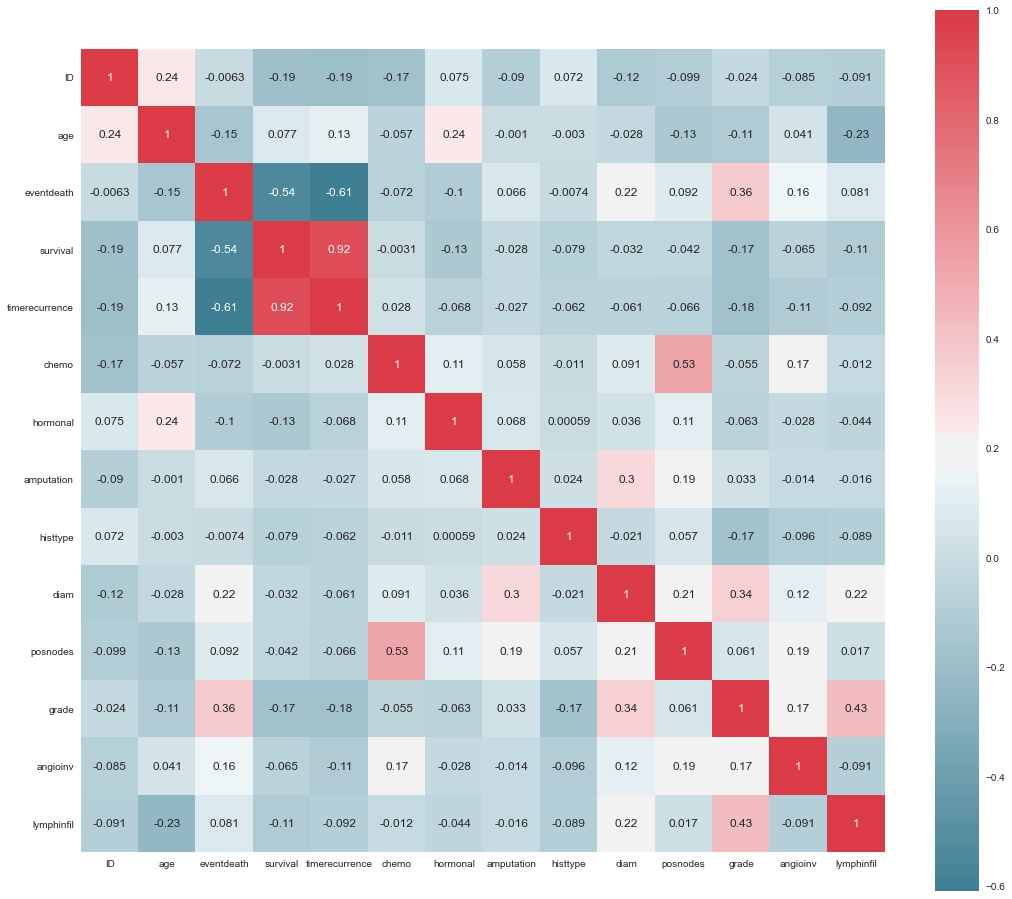

In [16]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 18 , 18 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

    corr, 

    cmap = cmap,

    square=True, 

    cbar_kws={ 'shrink' : .9 }, 

    ax=ax, 

    annot = True, 

    annot_kws = { 'fontsize' : 12 }

    )
plot_correlation_map( df )

# constatations

timereccurrence and survival rates are really closely interacted 
posnodes and chemio treatement are closely correlated 
the grade of the desease and the eventdeath have good correlation 
diam and amputation of the breast are in good relation 
also the grade of the cancer and the lymphinfil

In [17]:
df.columns

Index(['Patient', 'ID', 'age', 'eventdeath', 'survival', 'timerecurrence',
       'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes',
       'grade', 'angioinv', 'lymphinfil'],
      dtype='object')

In [18]:
df

,Patient,ID,age,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angioinv,lymphinfil
0,s122,18,43,0,14.817248,14.817248,0,0,1,1,25,0,2,3,1
1,s123,19,48,0,14.261465,14.261465,0,0,0,1,20,0,3,3,1
2,s124,20,38,0,6.644764,6.644764,0,0,0,1,15,0,2,1,1
3,s125,21,50,0,7.748118,7.748118,0,1,0,1,15,1,2,3,1
4,s126,22,38,0,6.436687,6.318960,0,0,1,1,15,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,s71,308,48,1,2.608300,1.982204,1,0,1,1,30,0,3,1,3
268,s72,309,39,1,5.504100,3.028063,0,0,1,1,30,0,2,1,1
269,s73,310,50,1,2.619200,2.149213,0,0,1,1,27,0,3,1,1
270,s75,311,52,1,2.290500,2.209446,0,1,1,1,28,0,3,1,1


# visualise class separation
the yellowbrick visualizer allow as to visualize the data in our dataset in relation with given classes 
in  the next session we define 2 classes " alive and dead" and will see their interaction with the data 
blue values are the alive and the green the dead 

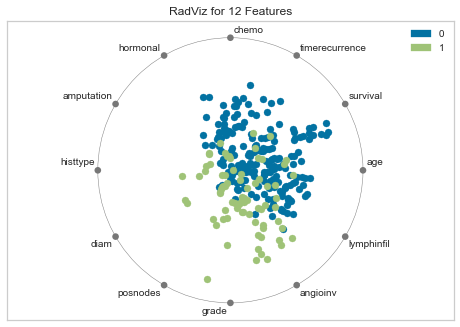

In [19]:

X = df.drop(['Patient', 'ID', 'eventdeath'],axis=1)
from yellowbrick.features.rankd import Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 

classes = ['alive', 'dead']
features = X.columns
visualizer = RadViz(clases=classes, features=features)
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

# supervised ML

## data splitting :
we drop patient Id and the patient and  then we split the data for the training 

In [20]:

X = df.drop(['Patient', 'ID', 'eventdeath'], axis=1)
y = df['eventdeath']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression 

In [21]:
# model training

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
# compute accuracy score
from sklearn.metrics import accuracy_score
logreg_acc_score = accuracy_score(y_test, logreg_pred)
print("logistic regression score:", logreg_acc_score)

logistic regression score: 0.9272727272727272


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


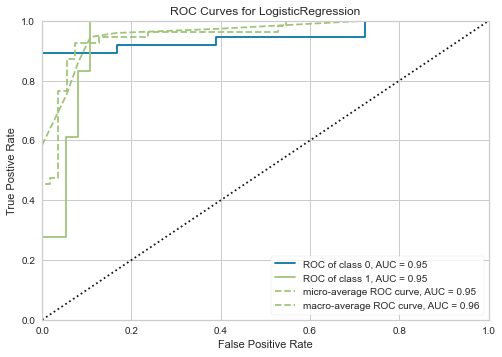

In [22]:
from yellowbrick.classifier import ROCAUC
logreg_roc = ROCAUC(logreg)
#ROCAUC: graph the receiver operator characteristic (ROC) and area under the curve (AUC)
logreg_roc.fit(X_train, y_train)
logreg_roc.score(X_test, y_test)
logreg_roc.poof()

The area under the curve (AUC)

The area under the curve (AUC) can be used as a summary of the model skill. for our model AUC =0.78 Generally, skilful models are represented by curves that bow up to the top left of the plot. so we can deduce that our model is a skilful one.

best accuracy for logistic regression 0.9272727272727272

# Knn classificaion 

KNNAccuracy : 0.8
KNNAccuracy : 0.8
KNNAccuracy : 0.8545454545454545
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.8363636363636363
KNNAccuracy : 0.8545454545454545
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.9090909090909091
KNNAccuracy : 0.8909090909090909
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.9090909090909091
KNNAccuracy : 0.8909090909090909
KNNAccuracy : 0.9090909090909091
KNNAccuracy : 0.8545454545454545
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.8545454545454545
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.8545454545454545
KNNAccuracy : 0.8545454545454545
KNNAccuracy : 0.8545454545454545
KNNAccuracy : 0.8545454545454545
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.8545454545454545
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.8727272727272727
KNNAccuracy : 0.8727272727272727


Text(0, 0.5, 'testing accuracy')

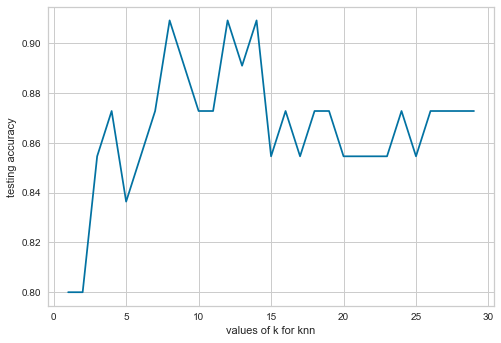

In [23]:
result=dict()
for n_neighbors in range(1,30):
        knn=KNeighborsClassifier(n_neighbors,weights="distance")
        knn.fit(X_train,y_train)
        KNNy_pred=knn.predict(X_test)
        a_score=accuracy_score(KNNy_pred, y_test)
        print("KNNAccuracy :" , a_score)
        result[n_neighbors]= [a_score]
# the dictionary of scores swich n_neighbors
# Optimal K Value Plot
kvalue=list(result.keys())
scores=list(result.values())

plt.plot(kvalue, scores)
plt.xlabel("values of k for knn")
plt.ylabel("testing accuracy")


the best score is obtained for a number of neighbors equal to 8, the obtained score is 0.9, the result is almost equal to the one obatined by logistic regression but slightly not better 

In [24]:
# plt.figure()
# sns.pairplot(df, hue = 'eventdeath', height=2, markers=["y", "n"])
# plt.show()

In [25]:
# decision tree 

In [26]:
# model training
from sklearn.tree import DecisionTreeClassifier
decreg = DecisionTreeClassifier()
decreg.fit(X_train, y_train)
decreg_pred = decreg.predict(X_test)
# compute accuracy score
decreg_acc_score = accuracy_score(y_test, decreg_pred)
print(" decision tree score",decreg_acc_score)

 decision tree score 0.9454545454545454


 decision tree score 0.9454545454545454

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


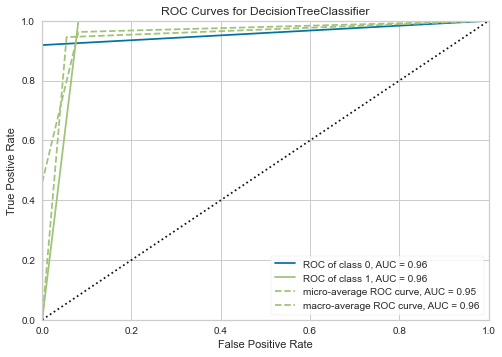

In [27]:
# plot ROC curve
decreg_roc = ROCAUC(decreg)

decreg_roc.fit(X_train, y_train)
decreg_roc.score(X_test, y_test)
decreg_roc.poof()

The area under the curve (AUC)

The area under the curve (AUC) can be used as a summary of the model skill. for our model AUC =0.78 Generally, skilful models are represented by curves that bow up to the top left of the plot. so we can deduce that our model is a skilful one.

# conclusion on supervised classification

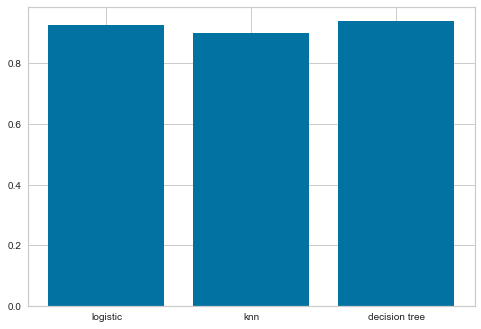

In [28]:
dict1={
    'logistic':0.927,
    'knn':0.9,
    'decision tree':0.94
}
plt.bar(*zip(*dict1.items()))
plt.show()

# unsupervised learning 
we are trying to classify patient in groups switch the data in the dataset

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient         272 non-null    object 
 1   ID              272 non-null    int64  
 2   age             272 non-null    int64  
 3   eventdeath      272 non-null    int64  
 4   survival        272 non-null    float64
 5   timerecurrence  272 non-null    float64
 6   chemo           272 non-null    int64  
 7   hormonal        272 non-null    int64  
 8   amputation      272 non-null    int64  
 9   histtype        272 non-null    int64  
 10  diam            272 non-null    int64  
 11  posnodes        272 non-null    int64  
 12  grade           272 non-null    int64  
 13  angioinv        272 non-null    int64  
 14  lymphinfil      272 non-null    int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 32.0+ KB


# Standardize data

In [30]:
# Standardize data
df=df.drop(["Patient","ID"],axis=1)
scaler = StandardScaler() 
scal_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
norm_df = normalize(scal_df) 
  
# Converting the numpy array into a pandas DataFrame 
norm_df = pd.DataFrame(norm_df) 

norm_df.rename(columns={0:'eventdeath',
                          1: 'survival',
                          2:'timerecurrence',
                          3: 'chemo',
                           4:'hormonal',
                           5:'amputation',
                            6:'histtype',
                            7:'diam',
                        8:'posnodes',
                        9:'grade',
                        10:'angoinv',
                        11:'lymphinfil'
                            
                       }, inplace=True)
norm_df


,eventdeath,survival,timerecurrence,chemo,hormonal,amputation,histtype,diam,posnodes,grade,angoinv,lymphinfil,12
0,-0.055643,-0.182018,0.500637,0.525639,-0.233258,-0.113131,0.326000,-0.058656,0.082376,-0.184657,-0.046804,0.448019,-0.126961
1,0.207737,-0.180159,0.454641,0.482055,-0.230875,-0.111975,-0.254740,-0.058057,-0.083476,-0.182770,0.313691,0.443442,-0.125664
2,-0.480012,-0.272043,-0.159481,-0.062883,-0.348625,-0.169085,-0.384661,-0.087666,-0.375218,-0.275986,-0.069952,-0.320245,-0.189755
3,0.302311,-0.174084,-0.023632,0.033065,-0.223090,0.709308,-0.246150,-0.056099,-0.240107,-0.044999,-0.044763,0.428488,-0.121427
4,-0.472810,-0.267961,-0.179853,-0.095258,-0.343395,-0.166548,0.479927,-0.086351,-0.369588,-0.271845,-0.068903,0.172058,-0.186908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.157951,0.346903,-0.306055,-0.275415,0.270698,-0.085139,0.245339,-0.044143,0.187458,-0.138968,0.238512,-0.161254,0.636536
268,-0.310710,0.534292,-0.221938,-0.339978,-0.270369,-0.131130,0.377866,-0.067988,0.288719,-0.214035,-0.054250,-0.248359,-0.147161
269,0.316342,0.461322,-0.406191,-0.354645,-0.233444,-0.113221,0.326260,-0.058702,0.149180,-0.184804,0.317180,-0.214440,-0.127062
270,0.329500,0.359662,-0.335739,-0.273228,-0.182000,0.578664,0.254363,-0.045766,0.142321,-0.144079,0.247284,-0.167184,-0.099062


# hierarchical clustering

In [31]:
cols= norm_df.columns
cols

Index([    'eventdeath',       'survival', 'timerecurrence',          'chemo',
             'hormonal',     'amputation',       'histtype',           'diam',
             'posnodes',          'grade',        'angoinv',     'lymphinfil',
                     12],
      dtype='object')

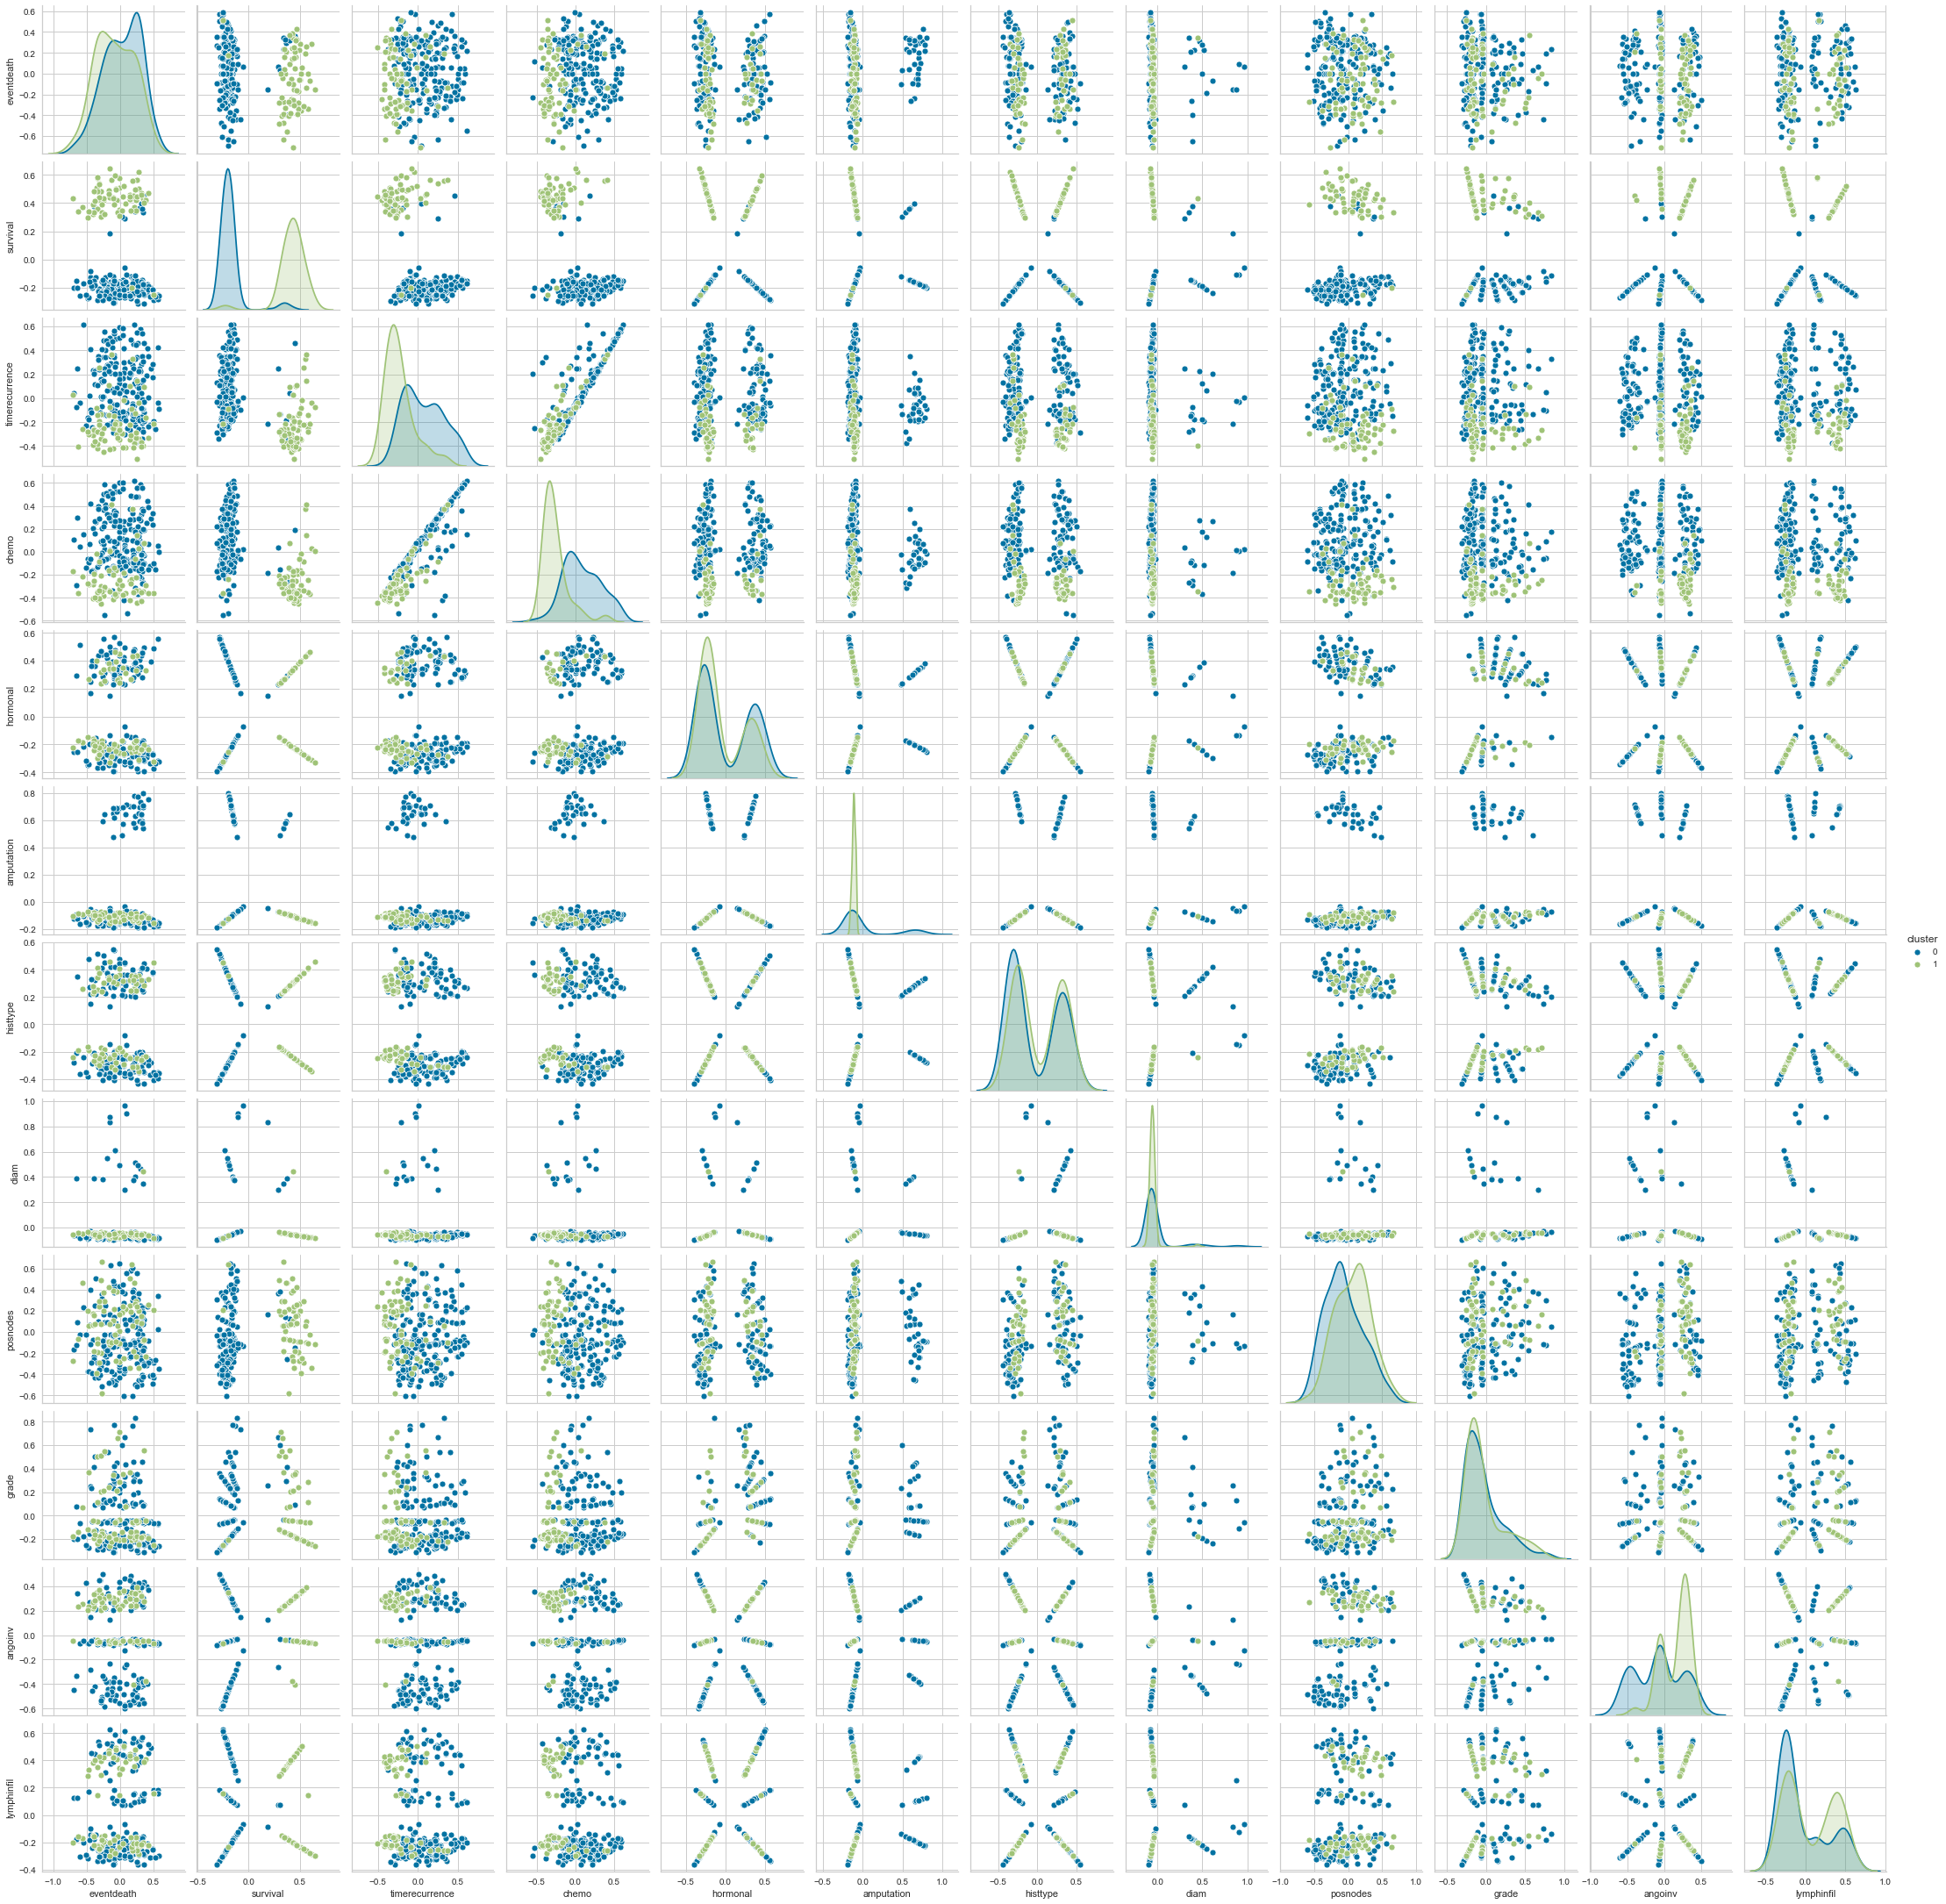

In [32]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(norm_df)
clust_labels
cols=['eventdeath', 'survival', 'timerecurrence', 'chemo','hormonal','amputation','histtype','diam','posnodes', 'grade','angoinv','lymphinfil']
norm_df['cluster'] = clust_labels
cols.append('cluster')
# make a Seaborn pairplot
sns.pairplot(norm_df[cols], hue='cluster')

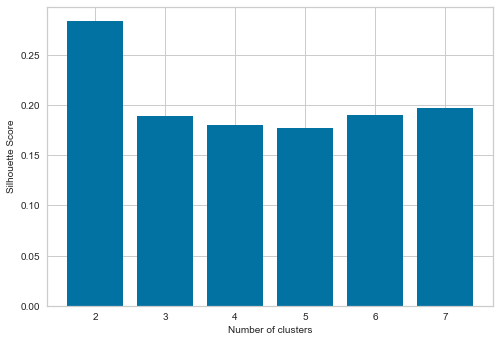

In [33]:

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(norm_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(norm_df))) 
    # Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

best number of clusters is 2 using the silouhete score: good classification
some parameters like survival timereccurrence and diam are very good indication of the death or survival of the patient

# Kmeans for 2 clusters 

For n_clusters = 2, silhouette score is 0.28385056848484813)
For n_clusters = 3, silhouette score is 0.19782103234631587)
For n_clusters = 4, silhouette score is 0.21714037444763193)
For n_clusters = 5, silhouette score is 0.2160763065858027)
For n_clusters = 6, silhouette score is 0.21245945712684722)
For n_clusters = 7, silhouette score is 0.20926574438593035)
For n_clusters = 8, silhouette score is 0.172238178974788)
For n_clusters = 9, silhouette score is 0.17064230860276303)
For n_clusters = 10, silhouette score is 0.1715272043441509)


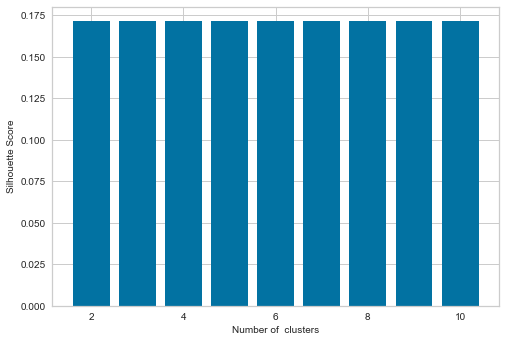

In [34]:
range_n_clusters=list (range(2,11))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(norm_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(norm_df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, score) 
plt.xlabel('Number of  clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()
    

these method didn't give us a good classification

# conclusion 
the best result of classification for this case of study have been given by supervised learning method than unsupervised learning method